In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date,datetime,timedelta

In [2]:
# prospect_engagements=pd.read_csv('/home/darshan/dev/AI_ML_Projects/schneider_electric /data/Schneider Electric Data/Email_Enagement_Data/prospect_email_engagements.csv')

In [4]:
prospect_engagements = pd.read_csv("/home/darshan/dev/AI_ML_Projects/schneider_electric/data/Schneider Electric Data/Email_Enagement_Data/click_email_prospect.csv")

In [5]:
prospect_engagements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428145 entries, 0 to 428144
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                428145 non-null  int64  
 1   FirstName                 428145 non-null  object 
 2   CompanyName               428145 non-null  object 
 3   source                    428145 non-null  object 
 4   header_date               424300 non-null  object 
 5   raw_status                424784 non-null  object 
 6   status                    424783 non-null  object 
 7   status_time               418459 non-null  object 
 8   reason                    1241 non-null    object 
 9   status_time_utc           418459 non-null  object 
 10  Email                     428145 non-null  object 
 11  day_of_week               418459 non-null  object 
 12  is_clicked_mail           428145 non-null  int64  
 13  time_category             428145 non-null  o

In [6]:
# prospect = pd.read_csv('/home/darshan/dev/AI_ML_Projects/schneider_electric /data/Schneider Electric Data/Email_Enagement_Data/SE Projects Consolidated File(Clean Revenue, EMP).csv')

In [7]:
prospect = pd.read_csv("/home/darshan/dev/AI_ML_Projects/schneider_electric/data/Schneider Electric Data/Email_Enagement_Data/SE Projects Consolidated File(Clean).csv")

/tmp/ipykernel_1346363/2769834194.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  prospect = pd.read_csv("/home/darshan/dev/AI_ML_Projects/schneider_electric/data/Schneider Electric Data/Email_Enagement_Data/SE Projects Consolidated File(Clean).csv")


In [8]:
prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156043 entries, 0 to 156042
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             156043 non-null  int64  
 1   Email                  156040 non-null  object 
 2   Project Name           156043 non-null  object 
 3   Delivery Status        156043 non-null  object 
 4   Title                  156043 non-null  object 
 5   Level                  142987 non-null  object 
 6   Department             142987 non-null  object 
 7   Contact_City           133182 non-null  object 
 8   Contact_State          116263 non-null  object 
 9   Contact_Zipcode        5183 non-null    object 
 10  Country                155851 non-null  object 
 11  Company City           149115 non-null  object 
 12  Company State          138500 non-null  object 
 13  Company Post Code      83733 non-null   object 
 14  Company Country        154396 non-nu

In [9]:
pd.options.display.max_columns=None
pd.options.display.max_info_columns=1000

## Update on prospect engagement email data 

In [10]:
prospect_engagements[prospect_engagements["segment"].isna()]

,Unnamed: 0,FirstName,CompanyName,source,header_date,raw_status,status,status_time,reason,status_time_utc,Email,day_of_week,is_clicked_mail,time_category,hour,segment,sender_email,header_date_utc,is_email_sent,is_email_clicked,is_email_opened,is_responded,is_bounced,is_unsubscribed,is_mail_not_sent,is_scheduled,total_clicked_mail,first_email_clicked_date,first_email_opened_date


### Segments is Null Count = 344085
### Segments is Not Null Count = 3692564

##### for not clicked feature engeneering we will take only data with segments

In [11]:
# prospect_engagements_with_segments = prospect_engagements[prospect_engagements["segment"].notna()]

In [12]:
total_email_clicked_count = prospect_engagements.groupby(["Email","segment"])["is_clicked_mail"].sum().reset_index(name='total_clicked_mail')

In [16]:
total_prospects_with_not_clicked = total_email_clicked_count[total_email_clicked_count["total_clicked_mail"] > 0]

In [17]:
updated_prospect_engagements = prospect_engagements.merge(total_prospects_with_not_clicked,on=["Email","segment"],how="inner")

In [18]:
updated_prospect_engagements.shape

(428145, 30)

In [19]:
prospect_engagements = updated_prospect_engagements

In [20]:
prospect_engagements.shape

(428145, 30)

In [21]:
email_sent_statuses=['EMAIL_SENT','EMAIL_CLICKED','EMAIL_OPENED','UNSUBSCRIBED','RESPONDED']
email_opened_statuses=['EMAIL_CLICKED','EMAIL_OPENED','RESPONDED']

In [22]:
prospect_engagements['is_email_sent']=prospect_engagements['status'].apply(lambda x : 1 if x in email_sent_statuses else 0)

In [23]:
prospect_engagements['is_email_clicked']=prospect_engagements['status'].apply(lambda x : 1 if x=='EMAIL_CLICKED' else 0)

In [24]:
prospect_engagements['is_email_opened']=prospect_engagements['status'].apply(lambda x : 1 if x in email_opened_statuses else 0)

In [25]:
prospect_engagements['is_responded']=prospect_engagements['status'].apply(lambda x : 1 if x=='RESPONDED' else 0)

In [26]:
prospect_engagements['is_bounced']=prospect_engagements['status'].apply(lambda x : 1 if x=='BOUNCED' else 0)

In [27]:
prospect_engagements['is_unsubscribed']=prospect_engagements['status'].apply(lambda x : 1 if x=='UNSUBSCRIBED' else 0)

In [28]:
prospect_engagements['is_mail_not_sent']=prospect_engagements['status'].apply(lambda x : 1 if x=='EMAIL_NOT_SENT' else 0)

In [29]:
prospect_engagements['is_scheduled']=prospect_engagements['status'].apply(lambda x : 1 if x=='SCHEDULED' else 0)

In [30]:
prospect_engagements.shape

(428145, 30)

In [31]:
prospect_engagements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428145 entries, 0 to 428144
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                428145 non-null  int64  
 1   FirstName                 428145 non-null  object 
 2   CompanyName               428145 non-null  object 
 3   source                    428145 non-null  object 
 4   header_date               424300 non-null  object 
 5   raw_status                424784 non-null  object 
 6   status                    424783 non-null  object 
 7   status_time               418459 non-null  object 
 8   reason                    1241 non-null    object 
 9   status_time_utc           418459 non-null  object 
 10  Email                     428145 non-null  object 
 11  day_of_week               418459 non-null  object 
 12  is_clicked_mail           428145 non-null  int64  
 13  time_category             428145 non-null  o

In [32]:
prospect_engagements['status_time_utc']=pd.to_datetime(prospect_engagements['status_time_utc'],utc=True)

In [33]:
prospect_engagements.shape

(428145, 30)

In [34]:
prospect_engagements.columns

Index(['Unnamed: 0', 'FirstName', 'CompanyName', 'source', 'header_date',
       'raw_status', 'status', 'status_time', 'reason', 'status_time_utc',
       'Email', 'day_of_week', 'is_clicked_mail', 'time_category', 'hour',
       'segment', 'sender_email', 'header_date_utc', 'is_email_sent',
       'is_email_clicked', 'is_email_opened', 'is_responded', 'is_bounced',
       'is_unsubscribed', 'is_mail_not_sent', 'is_scheduled',
       'total_clicked_mail_x', 'first_email_clicked_date',
       'first_email_opened_date', 'total_clicked_mail_y'],
      dtype='object')

In [35]:
prospect_engagements.drop(columns=['Unnamed: 0'],inplace=True)

## FEATURE ENGINEERING

## Total Emails Sent

In [36]:
total_emails_sent=prospect_engagements.groupby(['Email','segment'])['is_email_sent'].sum().reset_index(name='total_emails_sent')

In [37]:
total_emails_sent

,Email,segment,total_emails_sent
0,a-holley@ti.com,semiconductor,35
1,a-smith3@ti.com,semiconductor,69
2,a.danielson@aps.com,Power & Grid,14
3,a.freitas@samsung.com,semiconductor,76
4,a.khani@samsung.com,semiconductor,77
...,...,...,...
9764,zluo@amazon.com,robotics,8
9765,zoe.taylor@walmart.com,bms uk,63
9766,zsolt.gyurko@flextronics.com,robotics,63
9767,zulfiqar.haider@cityofchicago.org,airport,39


## Total Emails Clicked

In [38]:
total_emails_clicked=prospect_engagements.groupby(['Email','segment'])['is_email_clicked'].sum().reset_index(name='total_emails_clicked')

In [39]:
total_emails_clicked.sort_values(by='total_emails_clicked',ascending=False)

,Email,segment,total_emails_clicked
424,anahi.c@byd.com,mexico,34
2742,edgar_morales@honda.com,ev,25
7324,phillip_hendren@ahm.honda.com,ev,18
1517,chandler@gmfinancial.com,ev,16
2157,daniel_ruth@ahm.honda.com,ev,16
...,...,...,...
5503,laura.arnold@aecom.com,robotics,1
5506,laura.durso@nationalgrid.com,Power & Grid,1
5507,laura.fish@thermofisher.com,life sciences,1
5508,laura.fleming@pfizer.com,life sciences,1


## Total Emails Opened

In [40]:
total_emails_opened=prospect_engagements.groupby(['Email','segment'])['is_email_opened'].sum().reset_index(name='total_emails_opened')

In [41]:
total_emails_opened.sort_values(by='total_emails_opened',ascending=False)

,Email,segment,total_emails_opened
4718,joshua.ou@apple.com,bms uk,42
60,abhishek.phalke@nexsales.com,microgrid,41
7239,pchan@apple.com,bms uk,38
6983,niraj.chaudhary@nexsales.com,microgrid,36
424,anahi.c@byd.com,mexico,35
...,...,...,...
6026,mark.watczak@mspmac.org,airport,1
6028,mark.wilkin@worley.com,microgrid,1
18,aaron.colchado@lmco.com,robotics,1
20,aaron.dale@duke-energy.com,derms,1


## Total Emails Unsubscribed

In [42]:
total_emails_unsubscribed=prospect_engagements.groupby(['Email','segment'])['is_unsubscribed'].sum().reset_index(name='total_emails_unsubscribed')

In [43]:
total_emails_unsubscribed

,Email,segment,total_emails_unsubscribed
0,a-holley@ti.com,semiconductor,0
1,a-smith3@ti.com,semiconductor,0
2,a.danielson@aps.com,Power & Grid,0
3,a.freitas@samsung.com,semiconductor,0
4,a.khani@samsung.com,semiconductor,0
...,...,...,...
9764,zluo@amazon.com,robotics,0
9765,zoe.taylor@walmart.com,bms uk,0
9766,zsolt.gyurko@flextronics.com,robotics,0
9767,zulfiqar.haider@cityofchicago.org,airport,0


## Total Emails Bounced

In [44]:
total_emails_bounced=prospect_engagements.groupby(['Email','segment'])['is_bounced'].sum().reset_index(name='total_emails_bounced')

In [45]:
total_emails_bounced

,Email,segment,total_emails_bounced
0,a-holley@ti.com,semiconductor,0
1,a-smith3@ti.com,semiconductor,0
2,a.danielson@aps.com,Power & Grid,0
3,a.freitas@samsung.com,semiconductor,0
4,a.khani@samsung.com,semiconductor,0
...,...,...,...
9764,zluo@amazon.com,robotics,1
9765,zoe.taylor@walmart.com,bms uk,0
9766,zsolt.gyurko@flextronics.com,robotics,0
9767,zulfiqar.haider@cityofchicago.org,airport,0


In [46]:
prospect = prospect.rename(columns={"Email ID": "Email"})

In [47]:
prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156043 entries, 0 to 156042
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             156043 non-null  int64  
 1   Email                  156040 non-null  object 
 2   Project Name           156043 non-null  object 
 3   Delivery Status        156043 non-null  object 
 4   Title                  156043 non-null  object 
 5   Level                  142987 non-null  object 
 6   Department             142987 non-null  object 
 7   Contact_City           133182 non-null  object 
 8   Contact_State          116263 non-null  object 
 9   Contact_Zipcode        5183 non-null    object 
 10  Country                155851 non-null  object 
 11  Company City           149115 non-null  object 
 12  Company State          138500 non-null  object 
 13  Company Post Code      83733 non-null   object 
 14  Company Country        154396 non-nu

In [48]:
prospect.shape

(156043, 29)

In [49]:
prospect_engagements.shape

(428145, 29)

In [50]:
prospect_engagements = updated_prospect_engagements

In [53]:
unique_prospect=prospect_engagements[['Email','segment']]

In [54]:
unique_prospect=unique_prospect.drop_duplicates(subset=['Email','segment'])

In [55]:
unique_prospect['Email'].nunique()

9521

In [56]:
unique_prospect

,Email,segment
0,a-holley@ti.com,semiconductor
35,a-smith3@ti.com,semiconductor
106,a.danielson@aps.com,Power & Grid
120,a.freitas@samsung.com,semiconductor
200,a.khani@samsung.com,semiconductor
...,...,...
427915,zluo@amazon.com,robotics
427925,zoe.taylor@walmart.com,bms uk
427988,zsolt.gyurko@flextronics.com,robotics
428053,zulfiqar.haider@cityofchicago.org,airport


In [57]:
prospect_engagements

,FirstName,CompanyName,source,header_date,raw_status,status,status_time,reason,status_time_utc,Email,day_of_week,is_clicked_mail,time_category,hour,segment,sender_email,header_date_utc,is_email_sent,is_email_clicked,is_email_opened,is_responded,is_bounced,is_unsubscribed,is_mail_not_sent,is_scheduled,total_clicked_mail_x,first_email_clicked_date,first_email_opened_date,total_clicked_mail_y
0,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-13,EMAIL_SENT # 06/13/2024 - 05:32 PM UTC,EMAIL_SENT,06/13/2024 - 05:32 PM UTC,NaN,2024-06-13 17:32:00+00:00,a-holley@ti.com,Thursday,0,AFTERNOON,17.0,semiconductor,white.g@adeptpanels.com,2024-06-13 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1
1,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-14,EMAIL_SENT # 06/14/2024 - 06:29 PM UTC,EMAIL_SENT,06/14/2024 - 06:29 PM UTC,NaN,2024-06-14 18:29:00+00:00,a-holley@ti.com,Friday,0,EVENING,18.0,semiconductor,white.g@adeptpanels.com,2024-06-14 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1
2,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-15,EMAIL_SENT # 06/15/2024 - 06:54 PM UTC,EMAIL_SENT,06/15/2024 - 06:54 PM UTC,NaN,2024-06-15 18:54:00+00:00,a-holley@ti.com,Saturday,0,EVENING,18.0,semiconductor,white.g@adeptpanels.com,2024-06-15 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1
3,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-17,EMAIL_SENT # 06/17/2024 - 02:24 PM UTC,EMAIL_SENT,06/17/2024 - 02:24 PM UTC,NaN,2024-06-17 14:24:00+00:00,a-holley@ti.com,Monday,0,AFTERNOON,14.0,semiconductor,white.g@adeptpanels.com,2024-06-17 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1
4,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel1&3_Summer...,2024-06-18,EMAIL_SENT # 06/18/2024 - 06:55 PM UTC,EMAIL_SENT,06/18/2024 - 06:55 PM UTC,NaN,2024-06-18 18:55:00+00:00,a-holley@ti.com,Tuesday,0,EVENING,18.0,semiconductor,jennifer.halsey@insightlab.co,2024-06-18 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428140,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-21,EMAIL_CLICKED # Clicked: 01/22/2025 - 12:05 AM...,EMAIL_CLICKED,01/22/2025 - 12:05 AM EST,NaN,2025-01-22 05:05:00+00:00,zwadie.castro@jacobs.com,Wednesday,1,NIGHT,5.0,microgrid,gary.white@whitelabsolutions.co,2025-01-21 13:00:00+00:00,1,1,1,0,0,0,0,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2
428141,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-23,EMAIL_SENT # 01/23/2025 - 10:14 AM EST,EMAIL_SENT,01/23/2025 - 10:14 AM EST,NaN,2025-01-23 15:14:00+00:00,zwadie.castro@jacobs.com,Thursday,0,AFTERNOON,15.0,microgrid,gary.white@whitelabsolutions.co,2025-01-23 13:00:00+00:00,1,0,0,0,0,0,0,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2
428142,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-24,EMAIL_SENT # 01/24/2025 - 10:32 AM EST,EMAIL_SENT,01/24/2025 - 10:32 AM EST,NaN,2025-01-24 15:32:00+00:00,zwadie.castro@jacobs.com,Friday,0,AFTERNOON,15.0,microgrid,gary.white@whitelabsolutions.co,2025-01-24 13:00:00+00:00,1,0,0,0,0,0,0,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2
428143,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-25,0 # 01/25/2025 - 08:52 AM EST,EMAIL_NOT_SENT,01/25/2025 - 08:52 AM EST,NaN,2025-01-25 13:52:00+00:00,zwadie.castro@jacobs.com,Saturday,0,AFTERNOON,13.0,microgrid,gary.white@whitelabsolutions.co,2025-01-25 13:00:00+00:00,0,0,0,0,0,0,1,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2


In [58]:
unique_prospect=unique_prospect.merge(total_emails_sent, on=['Email','segment'], how='left')

In [59]:
unique_prospect=unique_prospect.merge(total_emails_opened, on=['Email','segment'], how='left',suffixes=('', '_drop'))

In [60]:
unique_prospect=unique_prospect.merge(total_emails_clicked, on=['Email','segment'], how='left',suffixes=('', '_drop'))

In [61]:
unique_prospect=unique_prospect.merge(total_emails_bounced, on=['Email','segment'], how='left',suffixes=('', '_drop'))

In [62]:
unique_prospect=unique_prospect.merge(total_emails_unsubscribed, on=['Email','segment'], how='left',suffixes=('', '_drop'))

In [63]:
unique_prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Email                      9769 non-null   object
 1   segment                    9769 non-null   object
 2   total_emails_sent          9769 non-null   int64 
 3   total_emails_opened        9769 non-null   int64 
 4   total_emails_clicked       9769 non-null   int64 
 5   total_emails_bounced       9769 non-null   int64 
 6   total_emails_unsubscribed  9769 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 534.4+ KB


## Average Time Between Emails

In [64]:
prospect_engagements['status_time_utc'] = pd.to_datetime(prospect_engagements['status_time_utc'], utc=True)

In [65]:
prospect_engagements

,FirstName,CompanyName,source,header_date,raw_status,status,status_time,reason,status_time_utc,Email,day_of_week,is_clicked_mail,time_category,hour,segment,sender_email,header_date_utc,is_email_sent,is_email_clicked,is_email_opened,is_responded,is_bounced,is_unsubscribed,is_mail_not_sent,is_scheduled,total_clicked_mail_x,first_email_clicked_date,first_email_opened_date,total_clicked_mail_y
0,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-13,EMAIL_SENT # 06/13/2024 - 05:32 PM UTC,EMAIL_SENT,06/13/2024 - 05:32 PM UTC,NaN,2024-06-13 17:32:00+00:00,a-holley@ti.com,Thursday,0,AFTERNOON,17.0,semiconductor,white.g@adeptpanels.com,2024-06-13 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1
1,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-14,EMAIL_SENT # 06/14/2024 - 06:29 PM UTC,EMAIL_SENT,06/14/2024 - 06:29 PM UTC,NaN,2024-06-14 18:29:00+00:00,a-holley@ti.com,Friday,0,EVENING,18.0,semiconductor,white.g@adeptpanels.com,2024-06-14 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1
2,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-15,EMAIL_SENT # 06/15/2024 - 06:54 PM UTC,EMAIL_SENT,06/15/2024 - 06:54 PM UTC,NaN,2024-06-15 18:54:00+00:00,a-holley@ti.com,Saturday,0,EVENING,18.0,semiconductor,white.g@adeptpanels.com,2024-06-15 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1
3,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-17,EMAIL_SENT # 06/17/2024 - 02:24 PM UTC,EMAIL_SENT,06/17/2024 - 02:24 PM UTC,NaN,2024-06-17 14:24:00+00:00,a-holley@ti.com,Monday,0,AFTERNOON,14.0,semiconductor,white.g@adeptpanels.com,2024-06-17 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1
4,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel1&3_Summer...,2024-06-18,EMAIL_SENT # 06/18/2024 - 06:55 PM UTC,EMAIL_SENT,06/18/2024 - 06:55 PM UTC,NaN,2024-06-18 18:55:00+00:00,a-holley@ti.com,Tuesday,0,EVENING,18.0,semiconductor,jennifer.halsey@insightlab.co,2024-06-18 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428140,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-21,EMAIL_CLICKED # Clicked: 01/22/2025 - 12:05 AM...,EMAIL_CLICKED,01/22/2025 - 12:05 AM EST,NaN,2025-01-22 05:05:00+00:00,zwadie.castro@jacobs.com,Wednesday,1,NIGHT,5.0,microgrid,gary.white@whitelabsolutions.co,2025-01-21 13:00:00+00:00,1,1,1,0,0,0,0,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2
428141,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-23,EMAIL_SENT # 01/23/2025 - 10:14 AM EST,EMAIL_SENT,01/23/2025 - 10:14 AM EST,NaN,2025-01-23 15:14:00+00:00,zwadie.castro@jacobs.com,Thursday,0,AFTERNOON,15.0,microgrid,gary.white@whitelabsolutions.co,2025-01-23 13:00:00+00:00,1,0,0,0,0,0,0,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2
428142,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-24,EMAIL_SENT # 01/24/2025 - 10:32 AM EST,EMAIL_SENT,01/24/2025 - 10:32 AM EST,NaN,2025-01-24 15:32:00+00:00,zwadie.castro@jacobs.com,Friday,0,AFTERNOON,15.0,microgrid,gary.white@whitelabsolutions.co,2025-01-24 13:00:00+00:00,1,0,0,0,0,0,0,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2
428143,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-25,0 # 01/25/2025 - 08:52 AM EST,EMAIL_NOT_SENT,01/25/2025 - 08:52 AM EST,NaN,2025-01-25 13:52:00+00:00,zwadie.castro@jacobs.com,Saturday,0,AFTERNOON,13.0,microgrid,gary.white@whitelabsolutions.co,2025-01-25 13:00:00+00:00,0,0,0,0,0,0,1,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2


In [66]:
prospect_engagements.sort_values(by=['Email','status_time_utc'],inplace=True)

In [67]:
sent_emails=prospect_engagements[prospect_engagements['is_email_sent']==1]

In [68]:
sent_emails['time_gap']=sent_emails.groupby(['Email','segment'])['status_time_utc'].diff().dt.days

/tmp/ipykernel_1346363/892213000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_emails['time_gap']=sent_emails.groupby(['Email','segment'])['status_time_utc'].diff().dt.days


In [69]:
avg_time_between_emails=sent_emails.groupby(['Email','segment'])['time_gap'].mean().reset_index().rename(columns={'time_gap': 'avg_time_between_emails'})

In [70]:
avg_time_between_emails

,Email,segment,avg_time_between_emails
0,a-holley@ti.com,semiconductor,1.147059
1,a-smith3@ti.com,semiconductor,1.000000
2,a.danielson@aps.com,Power & Grid,1.153846
3,a.freitas@samsung.com,semiconductor,0.866667
4,a.khani@samsung.com,semiconductor,0.842105
...,...,...,...
9764,zluo@amazon.com,robotics,5.714286
9765,zoe.taylor@walmart.com,bms uk,0.758065
9766,zsolt.gyurko@flextronics.com,robotics,0.951613
9767,zulfiqar.haider@cityofchicago.org,airport,1.815789


In [71]:
# not_clicked_prospects

In [72]:
# not_clicked_prospects=not_clicked_prospects.merge(avg_time_between_emails,on='Email',how='left')

In [73]:
unique_prospect=unique_prospect.merge(avg_time_between_emails,on=['Email','segment'],how='left')

In [74]:
unique_prospect

,Email,segment,total_emails_sent,total_emails_opened,total_emails_clicked,total_emails_bounced,total_emails_unsubscribed,avg_time_between_emails
0,a-holley@ti.com,semiconductor,35,1,1,0,0,1.147059
1,a-smith3@ti.com,semiconductor,69,1,1,0,0,1.000000
2,a.danielson@aps.com,Power & Grid,14,1,1,0,0,1.153846
3,a.freitas@samsung.com,semiconductor,76,3,2,0,0,0.866667
4,a.khani@samsung.com,semiconductor,77,1,1,0,0,0.842105
...,...,...,...,...,...,...,...,...
9764,zluo@amazon.com,robotics,8,3,3,1,0,5.714286
9765,zoe.taylor@walmart.com,bms uk,63,1,1,0,0,0.758065
9766,zsolt.gyurko@flextronics.com,robotics,63,1,1,0,0,0.951613
9767,zulfiqar.haider@cityofchicago.org,airport,39,1,1,0,0,1.815789


## Average Time Between Email Opened

In [75]:
opened_emails=prospect_engagements[prospect_engagements['is_email_opened']==1]

In [76]:
opened_emails.shape

(28327, 29)

In [77]:
opened_emails['time_gap']=opened_emails.groupby(['Email','segment'])['status_time_utc'].diff().dt.days

/tmp/ipykernel_1346363/2089499291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opened_emails['time_gap']=opened_emails.groupby(['Email','segment'])['status_time_utc'].diff().dt.days


In [78]:
avg_time_between_emails_opened=opened_emails.groupby(['Email','segment'])['time_gap'].mean().reset_index().rename(columns={'time_gap': 'avg_time_between_emails_opened'})

In [79]:
avg_time_between_emails_opened

,Email,segment,avg_time_between_emails_opened
0,a-holley@ti.com,semiconductor,NaN
1,a-smith3@ti.com,semiconductor,NaN
2,a.danielson@aps.com,Power & Grid,NaN
3,a.freitas@samsung.com,semiconductor,13.5
4,a.khani@samsung.com,semiconductor,NaN
...,...,...,...
9764,zluo@amazon.com,robotics,1.0
9765,zoe.taylor@walmart.com,bms uk,NaN
9766,zsolt.gyurko@flextronics.com,robotics,NaN
9767,zulfiqar.haider@cityofchicago.org,airport,NaN


In [80]:
unique_prospect=unique_prospect.merge(avg_time_between_emails_opened,on=['Email','segment'],how='left')

## Days Since Last Email Opened

In [81]:
prospect_engagements.sort_values(by=['Email','status_time_utc'],ascending=True,inplace=True)

In [82]:
prospects_last_email_opened_data=prospect_engagements[prospect_engagements['is_email_opened']==1].groupby(['Email','segment'])['status_time_utc'].max().reset_index(name='last_email_opened_date')

In [83]:
prospects_last_email_opened_data

,Email,segment,last_email_opened_date
0,a-holley@ti.com,semiconductor,2024-07-21 10:21:00+00:00
1,a-smith3@ti.com,semiconductor,2024-06-19 00:49:00+00:00
2,a.danielson@aps.com,Power & Grid,2024-01-26 14:47:00+00:00
3,a.freitas@samsung.com,semiconductor,2024-09-02 17:06:00+00:00
4,a.khani@samsung.com,semiconductor,2024-08-06 16:19:00+00:00
...,...,...,...
9764,zluo@amazon.com,robotics,2024-12-06 18:49:00+00:00
9765,zoe.taylor@walmart.com,bms uk,2025-01-10 12:18:00+00:00
9766,zsolt.gyurko@flextronics.com,robotics,2024-09-23 13:58:00+00:00
9767,zulfiqar.haider@cityofchicago.org,airport,2024-10-16 18:46:00+00:00


In [84]:
# not_clicked_prospects[not_clicked_prospects['derived_mail']=='zurielsuarez@dswinc.com']

In [85]:
# prospect_engagements[prospect_engagements['derived_mail']=='zurielsuarez@dswinc.com']['status'].value_counts()

In [86]:
import pytz
from datetime import date,datetime

# Define a specific date and time
today = datetime(2025, 2, 28, 0, 0, 0)  # Year, Month, Day, Hour, Minute, Second

# Assign UTC timezone
today_date_utc = today.replace(tzinfo=pytz.utc)

In [87]:
prospects_last_email_opened_data['days_since_last_email_opened']=(today_date_utc-prospects_last_email_opened_data['last_email_opened_date']).dt.days

In [88]:
prospects_last_email_opened_data

,Email,segment,last_email_opened_date,days_since_last_email_opened
0,a-holley@ti.com,semiconductor,2024-07-21 10:21:00+00:00,221
1,a-smith3@ti.com,semiconductor,2024-06-19 00:49:00+00:00,253
2,a.danielson@aps.com,Power & Grid,2024-01-26 14:47:00+00:00,398
3,a.freitas@samsung.com,semiconductor,2024-09-02 17:06:00+00:00,178
4,a.khani@samsung.com,semiconductor,2024-08-06 16:19:00+00:00,205
...,...,...,...,...
9764,zluo@amazon.com,robotics,2024-12-06 18:49:00+00:00,83
9765,zoe.taylor@walmart.com,bms uk,2025-01-10 12:18:00+00:00,48
9766,zsolt.gyurko@flextronics.com,robotics,2024-09-23 13:58:00+00:00,157
9767,zulfiqar.haider@cityofchicago.org,airport,2024-10-16 18:46:00+00:00,134


In [89]:
unique_prospect=unique_prospect.merge(prospects_last_email_opened_data[['Email','segment','days_since_last_email_opened']],on=['Email','segment'],how='left')

## Total Emails Sent On Week-Ends (Saturday - Sunday)

In [90]:
prospect_engagements['day_of_week']=prospect_engagements["status_time_utc"].dt.day_name()

In [91]:
sent_emails=prospect_engagements[prospect_engagements['is_email_sent']==1]

In [92]:
sent_emails['day_of_week'].value_counts()

day_of_week
Friday       72075
Monday       71924
Thursday     69144
Wednesday    68039
Tuesday      67322
Saturday     65139
Sunday         796
Name: count, dtype: int64

In [93]:
total_emails_sent_week_ends=sent_emails[sent_emails['day_of_week'].isin(['Saturday','Sunday'])].groupby(['Email','segment']).size().reset_index(name='total_emails_sent_week_ends')

In [94]:
total_emails_sent_week_ends

,Email,segment,total_emails_sent_week_ends
0,a-holley@ti.com,semiconductor,7
1,a-smith3@ti.com,semiconductor,11
2,a.danielson@aps.com,Power & Grid,3
3,a.freitas@samsung.com,semiconductor,13
4,a.khani@samsung.com,semiconductor,13
...,...,...,...
9605,zim.zaman@samsung.com,semiconductor,11
9606,zoe.taylor@walmart.com,bms uk,11
9607,zsolt.gyurko@flextronics.com,robotics,9
9608,zulfiqar.haider@cityofchicago.org,airport,6


In [95]:
unique_prospect=unique_prospect.merge(total_emails_sent_week_ends,on=['Email','segment'],how='left')

In [96]:
unique_prospect.columns

Index(['Email', 'segment', 'total_emails_sent', 'total_emails_opened',
       'total_emails_clicked', 'total_emails_bounced',
       'total_emails_unsubscribed', 'avg_time_between_emails',
       'avg_time_between_emails_opened', 'days_since_last_email_opened',
       'total_emails_sent_week_ends'],
      dtype='object')

In [97]:
# unique_prospect.drop(columns=['total_emails_sent_week_ends_x','total_emails_sent_week_ends_y'],inplace=True)

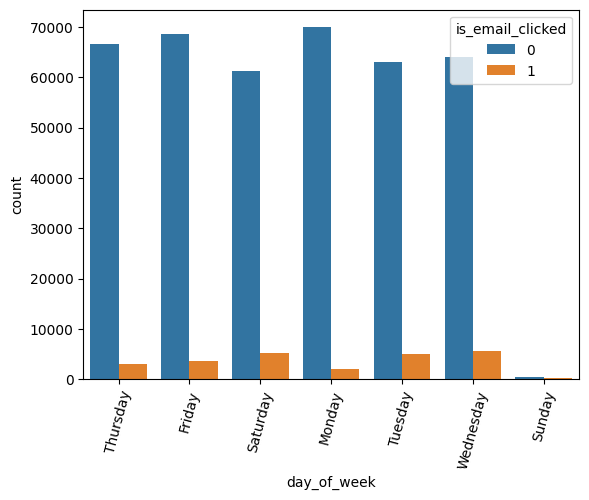

In [98]:
sns.countplot(x='day_of_week',data=prospect_engagements,hue='is_email_clicked')
plt.xticks(rotation=75)
plt.show()

## Has Ever Opened Email

In [101]:
unique_prospect['has_ever_opened_email']=unique_prospect['total_emails_opened'].apply(lambda x : 1 if x>0 else 0)

In [102]:
prospect_engagements.shape

(428145, 30)

In [103]:
prospect_engagements.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428145 entries, 0 to 428144
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   FirstName                 428145 non-null  object             
 1   CompanyName               428145 non-null  object             
 2   source                    428145 non-null  object             
 3   header_date               424300 non-null  object             
 4   raw_status                424784 non-null  object             
 5   status                    424783 non-null  object             
 6   status_time               418459 non-null  object             
 7   reason                    1241 non-null    object             
 8   status_time_utc           418459 non-null  datetime64[ns, UTC]
 9   Email                     428145 non-null  object             
 10  day_of_week               418459 non-null  object             
 11  is_cl

In [104]:
prospect.merge(prospect_engagements,on='Email',how='left')

,Unnamed: 0,Email,Project Name,Delivery Status,Title,Level,Department,Contact_City,Contact_State,Contact_Zipcode,Country,Company City,Company State,Company Post Code,Company Country,Industry,SUB Industry,Revenue,Revenue Range,EMP Range,Clean Revenue,Clean Revenue Range,Clean EMP Range,Clean EMP Size,Clean Country,Clean Company Country,Clean Industry,Clean Level,Clean Department,FirstName,CompanyName,source,header_date,raw_status,status,status_time,reason,status_time_utc,day_of_week,is_clicked_mail,time_category,hour,segment,sender_email,header_date_utc,is_email_sent,is_email_clicked,is_email_opened,is_responded,is_bounced,is_unsubscribed,is_mail_not_sent,is_scheduled,total_clicked_mail_x,first_email_clicked_date,first_email_opened_date,total_clicked_mail_y,has_ever_opened_email
0,0,miller.roxanne@albertsons.com,Microgrids,Delivery 1,Chief Financial Officer,CXO,Finance,Pocatello,ID,NaN,United States,Boise,ID,NaN,United States,Retail,Grocery Retail,$79.5B,10B+,"10,000+",7.950000e+10,10B+,"5,001 - 10,000",10000.0,United States,United States,Retail,CXO,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,michael.rich@albertsons.com,Microgrids,Delivery 1,Director Corporate Finance,Dir,Finance,Meridian,ID,NaN,United States,Boise,ID,NaN,United States,Retail,Grocery Retail,$79.5B,10B+,"10,000+",7.950000e+10,10B+,"5,001 - 10,000",10000.0,United States,United States,Retail,Dir,Finance,Michael,Albertsons,September 2024/SE_Microgrids_Del1and2_25Sep_20...,2024-09-25,EMAIL_SENT # 09/25/2024 - 04:08 PM UTC,EMAIL_SENT,09/25/2024 - 04:08 PM UTC,NaN,2024-09-25 16:08:00+00:00,Wednesday,0.0,AFTERNOON,16.0,microgrid,johnnorton@insightlab.co,2024-09-25 12:00:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2024-11-12 03:56:00+00:00,2024-11-12 03:56:00+00:00,3.0,NaN
2,1,michael.rich@albertsons.com,Microgrids,Delivery 1,Director Corporate Finance,Dir,Finance,Meridian,ID,NaN,United States,Boise,ID,NaN,United States,Retail,Grocery Retail,$79.5B,10B+,"10,000+",7.950000e+10,10B+,"5,001 - 10,000",10000.0,United States,United States,Retail,Dir,Finance,Michael,Albertsons,September 2024/SE_Microgrids_Del1and2_25Sep_20...,2024-09-26,EMAIL_SENT # 09/26/2024 - 03:23 PM UTC,EMAIL_SENT,09/26/2024 - 03:23 PM UTC,NaN,2024-09-26 15:23:00+00:00,Thursday,0.0,AFTERNOON,15.0,microgrid,johnnorton@insightlab.co,2024-09-26 12:00:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2024-11-12 03:56:00+00:00,2024-11-12 03:56:00+00:00,3.0,NaN
3,1,michael.rich@albertsons.com,Microgrids,Delivery 1,Director Corporate Finance,Dir,Finance,Meridian,ID,NaN,United States,Boise,ID,NaN,United States,Retail,Grocery Retail,$79.5B,10B+,"10,000+",7.950000e+10,10B+,"5,001 - 10,000",10000.0,United States,United States,Retail,Dir,Finance,Michael,Albertsons,September 2024/SE_Microgrids_Del1and2_25Sep_20...,2024-09-27,EMAIL_SENT # 09/27/2024 - 02:28 PM UTC,EMAIL_SENT,09/27/2024 - 02:28 PM UTC,NaN,2024-09-27 14:28:00+00:00,Friday,0.0,AFTERNOON,14.0,microgrid,johnnorton@insightlab.co,2024-09-27 12:00:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2024-11-12 03:56:00+00:00,2024-11-12 03:56:00+00:00,3.0,NaN
4,1,michael.rich@albertsons.com,Microgrids,Delivery 1,Director Corporate Finance,Dir,Finance,Meridian,ID,NaN,United States,Boise,ID,NaN,United States,Retail,Grocery Retail,$79.5B,10B+,"10,000+",7.950000e+10,10B+,"5,001 - 10,000",10000.0,United States,United States,Retail,Dir,Finance,Michael,Albertsons,September 2024/SE_Microgrids_Del1and2_25Sep_20...,2024-09-28,EMAIL_SENT # 09/28/2024 - 01:17 PM UTC,EMAIL_SENT,09/28/2024 - 01:17 PM UTC,NaN,2024-09-28 13:17:00+00:00,Saturday,0.0,AFTERNOON,13.0,microgrid,johnnorton@insightlab.co,2024-09-28 12:00:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2024-11-12 03:56:00+00:00,2024-11-12 03:56:00+00:00,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [105]:
prospect_engagements.to_csv("not_clicked_email_engagements_features.csv",index=False)

In [107]:
prospect_engagements

,FirstName,CompanyName,source,header_date,raw_status,status,status_time,reason,status_time_utc,Email,day_of_week,is_clicked_mail,time_category,hour,segment,sender_email,header_date_utc,is_email_sent,is_email_clicked,is_email_opened,is_responded,is_bounced,is_unsubscribed,is_mail_not_sent,is_scheduled,total_clicked_mail_x,first_email_clicked_date,first_email_opened_date,total_clicked_mail_y,has_ever_opened_email
0,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-13,EMAIL_SENT # 06/13/2024 - 05:32 PM UTC,EMAIL_SENT,06/13/2024 - 05:32 PM UTC,NaN,2024-06-13 17:32:00+00:00,a-holley@ti.com,Thursday,0,AFTERNOON,17.0,semiconductor,white.g@adeptpanels.com,2024-06-13 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1,1.0
1,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-14,EMAIL_SENT # 06/14/2024 - 06:29 PM UTC,EMAIL_SENT,06/14/2024 - 06:29 PM UTC,NaN,2024-06-14 18:29:00+00:00,a-holley@ti.com,Friday,0,EVENING,18.0,semiconductor,white.g@adeptpanels.com,2024-06-14 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1,1.0
2,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-15,EMAIL_SENT # 06/15/2024 - 06:54 PM UTC,EMAIL_SENT,06/15/2024 - 06:54 PM UTC,NaN,2024-06-15 18:54:00+00:00,a-holley@ti.com,Saturday,0,EVENING,18.0,semiconductor,white.g@adeptpanels.com,2024-06-15 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1,1.0
3,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-17,EMAIL_SENT # 06/17/2024 - 02:24 PM UTC,EMAIL_SENT,06/17/2024 - 02:24 PM UTC,NaN,2024-06-17 14:24:00+00:00,a-holley@ti.com,Monday,0,AFTERNOON,14.0,semiconductor,white.g@adeptpanels.com,2024-06-17 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1,1.0
4,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel1&3_Summer...,2024-06-18,EMAIL_SENT # 06/18/2024 - 06:55 PM UTC,EMAIL_SENT,06/18/2024 - 06:55 PM UTC,NaN,2024-06-18 18:55:00+00:00,a-holley@ti.com,Tuesday,0,EVENING,18.0,semiconductor,jennifer.halsey@insightlab.co,2024-06-18 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428140,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-21,EMAIL_CLICKED # Clicked: 01/22/2025 - 12:05 AM...,EMAIL_CLICKED,01/22/2025 - 12:05 AM EST,NaN,2025-01-22 05:05:00+00:00,zwadie.castro@jacobs.com,Wednesday,1,NIGHT,5.0,microgrid,gary.white@whitelabsolutions.co,2025-01-21 13:00:00+00:00,1,1,1,0,0,0,0,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2,NaN
428141,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-23,EMAIL_SENT # 01/23/2025 - 10:14 AM EST,EMAIL_SENT,01/23/2025 - 10:14 AM EST,NaN,2025-01-23 15:14:00+00:00,zwadie.castro@jacobs.com,Thursday,0,AFTERNOON,15.0,microgrid,gary.white@whitelabsolutions.co,2025-01-23 13:00:00+00:00,1,0,0,0,0,0,0,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2,NaN
428142,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-24,EMAIL_SENT # 01/24/2025 - 10:32 AM EST,EMAIL_SENT,01/24/2025 - 10:32 AM EST,NaN,2025-01-24 15:32:00+00:00,zwadie.castro@jacobs.com,Friday,0,AFTERNOON,15.0,microgrid,gary.white@whitelabsolutions.co,2025-01-24 13:00:00+00:00,1,0,0,0,0,0,0,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2,NaN
428143,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-25,0 # 01/25/2025 - 08:52 AM EST,EMAIL_NOT_SENT,01/25/2025 - 08:52 AM EST,NaN,2025-01-25 13:52:00+00:00,zwadie.castro@jacobs.com,Saturday,0,AFTERNOON,13.0,microgrid,gary.white@whitelabsolutions.co,2025-01-25 13:00:00+00:00,0,0,0,0,0,0,1,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2,NaN


## Continue with other features

In [108]:
import pytz
from datetime import date,datetime

# Define a specific date and time
today = datetime(2025, 2, 28, 0, 0, 0)  # Year, Month, Day, Hour, Minute, Second

# Assign UTC timezone
today_date_utc = today.replace(tzinfo=pytz.utc)

In [109]:
from datetime import timedelta

prospect_engagements['2_weeks_ago'] = today_date_utc - timedelta(weeks=2)

prospect_engagements['4_weeks_ago'] = today_date_utc - timedelta(weeks=4)

prospect_engagements['8_weeks_ago'] = today_date_utc - timedelta(weeks=8)

prospect_engagements['12_weeks_ago'] = today_date_utc - timedelta(weeks=12)


two_weeks_ago_propspect_engagements = prospect_engagements[
    (prospect_engagements['status_time_utc'] >= prospect_engagements['2_weeks_ago']) & (prospect_engagements['is_email_sent'] ==1)
]


four_weeks_ago_propspect_engagements = prospect_engagements[
    (prospect_engagements['status_time_utc'] >= prospect_engagements['4_weeks_ago']) & (prospect_engagements['is_email_sent'] ==1)
]

eight_weeks_ago_propspect_engagements = prospect_engagements[
    (prospect_engagements['status_time_utc'] >= prospect_engagements['8_weeks_ago']) & (prospect_engagements['is_email_sent'] ==1)
]

twelve_weeks_ago_propspect_engagements = prospect_engagements[
    (prospect_engagements['status_time_utc'] >= prospect_engagements['12_weeks_ago']) & (prospect_engagements['is_email_sent'] ==1)
]

In [110]:

total_emails_sent_last_two_weeks = (
    two_weeks_ago_propspect_engagements
    .groupby(['Email','segment'])
    .size()
    .reset_index(name='total_emails_sent_last_two_weeks')
)


total_emails_sent_last_four_weeks = (
    four_weeks_ago_propspect_engagements
    .groupby(['Email','segment'])
    .size()
    .reset_index(name='total_emails_sent_last_four_weeks')
)


total_emails_sent_last_eight_weeks = (
    eight_weeks_ago_propspect_engagements
    .groupby(['Email','segment'])
    .size()
    .reset_index(name='total_emails_sent_last_eight_weeks')
)


total_emails_sent_last_twelve_weeks = (
    twelve_weeks_ago_propspect_engagements
    .groupby(['Email','segment'])
    .size()
    .reset_index(name='total_emails_sent_last_twelve_weeks')
)

In [111]:
two_weeks_ago_propspect_open_emails = prospect_engagements[
    (prospect_engagements['status_time_utc'] >= prospect_engagements['2_weeks_ago']) & (prospect_engagements['is_email_opened'] ==1)
]

four_weeks_ago_propspect_open_emails = prospect_engagements[
    (prospect_engagements['status_time_utc'] >= prospect_engagements['4_weeks_ago']) & (prospect_engagements['is_email_opened'] ==1)
]

eight_weeks_ago_propspect_open_emails = prospect_engagements[
    (prospect_engagements['status_time_utc'] >= prospect_engagements['8_weeks_ago']) & (prospect_engagements['is_email_opened'] ==1)
]

twelve_weeks_ago_propspect_open_emails = prospect_engagements[
    (prospect_engagements['status_time_utc'] >= prospect_engagements['12_weeks_ago']) & (prospect_engagements['is_email_opened'] ==1)
]

In [112]:
total_emails_opened_last_two_weeks = (
    two_weeks_ago_propspect_open_emails
    .groupby(['Email','segment'])
    .size()
    .reset_index(name='total_emails_opened_last_two_weeks')
)

total_emails_opened_last_four_weeks = (
    four_weeks_ago_propspect_open_emails
    .groupby(['Email','segment'])
    .size()
    .reset_index(name='total_emails_opened_last_four_weeks')
)

total_emails_opened_last_eight_weeks = (
    eight_weeks_ago_propspect_open_emails
    .groupby(['Email','segment'])
    .size()
    .reset_index(name='total_emails_opened_last_eight_weeks')
)


total_emails_opened_last_twelve_weeks = (
    twelve_weeks_ago_propspect_open_emails
    .groupby(['Email','segment'])
    .size()
    .reset_index(name='total_emails_opened_last_twelve_weeks')
)

In [113]:
total_emails_sent_last_two_weeks

,Email,segment,total_emails_sent_last_two_weeks
0,aattalla@rbi.com,bms uk,9
1,abarnes@ulta.com,bms uk,9
2,abutler@ulta.com,bms uk,9
3,adam.dent@meijer.com,bms uk,9
4,adam.frazier@ros.com,bms uk,9
...,...,...,...
652,yarinette_mcclure@homedepot.com,bms uk,9
653,yelamrani@hudsongroup.com,bms uk,9
654,ylopez@ulta.com,bms uk,9
655,zcrosby@chipotle.com,bms uk,9


In [114]:
total_emails_sent_last_four_weeks

,Email,segment,total_emails_sent_last_four_weeks
0,aattalla@rbi.com,bms uk,21
1,abarnes@ulta.com,bms uk,19
2,abutler@ulta.com,bms uk,20
3,adam.dent@meijer.com,bms uk,21
4,adam.frazier@ros.com,bms uk,21
...,...,...,...
768,yelamrani@hudsongroup.com,bms uk,19
769,ylopez@ulta.com,bms uk,19
770,yoali.s@pg.com,mexico,6
771,zcrosby@chipotle.com,bms uk,21


In [115]:
total_emails_sent_last_eight_weeks

,Email,segment,total_emails_sent_last_eight_weeks
0,a.wilcox@nexteraenergy.com,microgrid,20
1,aaron.blood@nexteraenergy.com,microgrid,20
2,aaron.johnson@tlc-eng.com,microgrid,20
3,aaron.kramer@mail.mil,microgrid,8
4,aaron.sarfati@jacobs.com,microgrid,18
...,...,...,...
3314,zane.wilson@jacobs.com,microgrid,18
3315,zcrosby@chipotle.com,bms uk,24
3316,zeb.anderson@jacobs.com,microgrid,18
3317,zoe.taylor@walmart.com,bms uk,44


In [116]:
total_emails_sent_last_twelve_weeks

,Email,segment,total_emails_sent_last_twelve_weeks
0,a.wilcox@nexteraenergy.com,microgrid,42
1,aaron.bills@xcelenergy.com,derms,3
2,aaron.blood@nexteraenergy.com,microgrid,42
3,aaron.chladil@xenuclear.com,derms,5
4,aaron.colchado@lmco.com,robotics,2
...,...,...,...
4594,zhua@amazon.com,robotics,2
4595,zluo@amazon.com,robotics,2
4596,zoe.taylor@walmart.com,bms uk,63
4597,zsolt.gyurko@flextronics.com,robotics,2


In [117]:
total_emails_opened_last_two_weeks

,Email,segment,total_emails_opened_last_two_weeks
0,abutler@ulta.com,bms uk,1
1,adrian.lat@apple.com,bms uk,6
2,aesqueda@hudsongroup.com,bms uk,1
3,agustinrafael.sucari@bayer.com,mexico,1
4,ajohnson@ulta.com,bms uk,1
...,...,...,...
109,vanessa.aguilar@sephora.com,bms uk,1
110,vrodowicz@ulta.com,bms uk,1
111,wfuller@ulta.com,bms uk,1
112,yelamrani@hudsongroup.com,bms uk,1


In [118]:
total_emails_opened_last_four_weeks

,Email,segment,total_emails_opened_last_four_weeks
0,abarnes@ulta.com,bms uk,1
1,abutler@ulta.com,bms uk,1
2,adrian.lat@apple.com,bms uk,13
3,aesqueda@hudsongroup.com,bms uk,1
4,agupta@ulta.com,bms uk,1
...,...,...,...
272,wfuller@ulta.com,bms uk,1
273,yarinette_mcclure@homedepot.com,bms uk,1
274,yelamrani@hudsongroup.com,bms uk,1
275,ylopez@ulta.com,bms uk,2


In [119]:
total_emails_opened_last_eight_weeks

,Email,segment,total_emails_opened_last_eight_weeks
0,a.wilcox@nexteraenergy.com,microgrid,2
1,aaron.blood@nexteraenergy.com,microgrid,2
2,aaron.johnson@tlc-eng.com,microgrid,2
3,aaron.kramer@mail.mil,microgrid,1
4,aaron.sarfati@jacobs.com,microgrid,2
...,...,...,...
2945,zack_nakayama@ahm.honda.com,microgrid,2
2946,zane.wilson@jacobs.com,microgrid,2
2947,zeb.anderson@jacobs.com,microgrid,2
2948,zoe.taylor@walmart.com,bms uk,1


In [120]:
total_emails_opened_last_twelve_weeks

,Email,segment,total_emails_opened_last_twelve_weeks
0,a.wilcox@nexteraenergy.com,microgrid,3
1,aaron.blood@nexteraenergy.com,microgrid,2
2,aaron.chladil@xenuclear.com,derms,1
3,aaron.johnson@tlc-eng.com,microgrid,2
4,aaron.kramer@mail.mil,microgrid,1
...,...,...,...
3486,zhe@amazon.com,robotics,1
3487,zhua@amazon.com,robotics,1
3488,zluo@amazon.com,robotics,1
3489,zoe.taylor@walmart.com,bms uk,1


In [121]:
prospect_engagements.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428145 entries, 0 to 428144
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   FirstName                 428145 non-null  object             
 1   CompanyName               428145 non-null  object             
 2   source                    428145 non-null  object             
 3   header_date               424300 non-null  object             
 4   raw_status                424784 non-null  object             
 5   status                    424783 non-null  object             
 6   status_time               418459 non-null  object             
 7   reason                    1241 non-null    object             
 8   status_time_utc           418459 non-null  datetime64[ns, UTC]
 9   Email                     428145 non-null  object             
 10  day_of_week               418459 non-null  object             
 11  is_cl

In [122]:
unique_prospect = unique_prospect.merge(total_emails_sent_last_two_weeks,on=['Email','segment'],how='left')
unique_prospect = unique_prospect.merge(total_emails_sent_last_four_weeks,on=['Email','segment'],how='left')
unique_prospect = unique_prospect.merge(total_emails_sent_last_eight_weeks,on=['Email','segment'],how='left')
unique_prospect = unique_prospect.merge(total_emails_sent_last_twelve_weeks,on=['Email','segment'],how='left')

In [123]:
unique_prospect = unique_prospect.merge(total_emails_opened_last_two_weeks,on=['Email','segment'],how='left')
unique_prospect = unique_prospect.merge(total_emails_opened_last_four_weeks,on=['Email','segment'],how='left')
unique_prospect = unique_prospect.merge(total_emails_opened_last_eight_weeks,on=['Email','segment'],how='left')
unique_prospect = unique_prospect.merge(total_emails_opened_last_twelve_weeks,on=['Email','segment'],how='left')

In [124]:
# prospect_engagements

# Total Emails Send On Week-Ends (Saturday-Sunday)

In [125]:
sent_emails=prospect_engagements[prospect_engagements['is_email_sent']==1]

In [126]:
total_emails_sent_week_ends=sent_emails[sent_emails['day_of_week'].isin(['Saturday','Sunday'])].groupby(['Email','segment']).size().reset_index(name='total_emails_sent_week_ends')

In [127]:
total_emails_sent_week_ends

,Email,segment,total_emails_sent_week_ends
0,a-holley@ti.com,semiconductor,7
1,a-smith3@ti.com,semiconductor,11
2,a.danielson@aps.com,Power & Grid,3
3,a.freitas@samsung.com,semiconductor,13
4,a.khani@samsung.com,semiconductor,13
...,...,...,...
9605,zim.zaman@samsung.com,semiconductor,11
9606,zoe.taylor@walmart.com,bms uk,11
9607,zsolt.gyurko@flextronics.com,robotics,9
9608,zulfiqar.haider@cityofchicago.org,airport,6


In [128]:
unique_prospect = unique_prospect.merge(total_emails_sent_week_ends,on=['Email','segment'],how='left')

## Bounce Rate

In [129]:
unique_prospect["bounce_rate"]=np.where(
    ((unique_prospect["total_emails_bounced"] > 0) & (unique_prospect["total_emails_sent"] > 0)),
    unique_prospect["total_emails_bounced"] / unique_prospect["total_emails_sent"],
    0
)

In [130]:
unique_prospect["bounce_rate"].value_counts()

bounce_rate
0.000000    8750
0.027778     112
0.027027      63
0.019231      62
0.090909      53
            ... 
0.011905       1
0.013699       1
0.012048       1
0.250000       1
0.050000       1
Name: count, Length: 94, dtype: int64

## Open Rate

In [131]:
unique_prospect["email_open_rate"]=np.where(
    ((unique_prospect["total_emails_opened"] > 0) & (unique_prospect["total_emails_sent"] > 0)),
    unique_prospect["total_emails_opened"] / unique_prospect["total_emails_sent"],
    0
)

## Click Rate

In [132]:
unique_prospect["email_click_rate"]=np.where(
    ((unique_prospect["total_emails_clicked"] > 0) & (unique_prospect["total_emails_sent"] > 0)),
    unique_prospect["total_emails_clicked"] / unique_prospect["total_emails_sent"],
    0
)

## Last Email Status

In [133]:
prospect_engagements.sort_values(by=['Email','segment','status_time_utc'],inplace=True)

In [134]:
prospect_engagements

,FirstName,CompanyName,source,header_date,raw_status,status,status_time,reason,status_time_utc,Email,day_of_week,is_clicked_mail,time_category,hour,segment,sender_email,header_date_utc,is_email_sent,is_email_clicked,is_email_opened,is_responded,is_bounced,is_unsubscribed,is_mail_not_sent,is_scheduled,total_clicked_mail_x,first_email_clicked_date,first_email_opened_date,total_clicked_mail_y,has_ever_opened_email,2_weeks_ago,4_weeks_ago,8_weeks_ago,12_weeks_ago
0,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-13,EMAIL_SENT # 06/13/2024 - 05:32 PM UTC,EMAIL_SENT,06/13/2024 - 05:32 PM UTC,NaN,2024-06-13 17:32:00+00:00,a-holley@ti.com,Thursday,0,AFTERNOON,17.0,semiconductor,white.g@adeptpanels.com,2024-06-13 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1,1.0,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
1,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-14,EMAIL_SENT # 06/14/2024 - 06:29 PM UTC,EMAIL_SENT,06/14/2024 - 06:29 PM UTC,NaN,2024-06-14 18:29:00+00:00,a-holley@ti.com,Friday,0,EVENING,18.0,semiconductor,white.g@adeptpanels.com,2024-06-14 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1,1.0,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
2,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-15,EMAIL_SENT # 06/15/2024 - 06:54 PM UTC,EMAIL_SENT,06/15/2024 - 06:54 PM UTC,NaN,2024-06-15 18:54:00+00:00,a-holley@ti.com,Saturday,0,EVENING,18.0,semiconductor,white.g@adeptpanels.com,2024-06-15 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1,1.0,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
3,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-17,EMAIL_SENT # 06/17/2024 - 02:24 PM UTC,EMAIL_SENT,06/17/2024 - 02:24 PM UTC,NaN,2024-06-17 14:24:00+00:00,a-holley@ti.com,Monday,0,AFTERNOON,14.0,semiconductor,white.g@adeptpanels.com,2024-06-17 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1,1.0,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
4,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel1&3_Summer...,2024-06-18,EMAIL_SENT # 06/18/2024 - 06:55 PM UTC,EMAIL_SENT,06/18/2024 - 06:55 PM UTC,NaN,2024-06-18 18:55:00+00:00,a-holley@ti.com,Tuesday,0,EVENING,18.0,semiconductor,jennifer.halsey@insightlab.co,2024-06-18 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1,1.0,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428140,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-21,EMAIL_CLICKED # Clicked: 01/22/2025 - 12:05 AM...,EMAIL_CLICKED,01/22/2025 - 12:05 AM EST,NaN,2025-01-22 05:05:00+00:00,zwadie.castro@jacobs.com,Wednesday,1,NIGHT,5.0,microgrid,gary.white@whitelabsolutions.co,2025-01-21 13:00:00+00:00,1,1,1,0,0,0,0,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2,NaN,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
428141,Zwadie,Jacobs,January 2025/SE_Microgrid_21st_Jan_2025-21_Jan...,2025-01-23,EMAIL_SENT # 01/23/2025 - 10:14 AM EST,EMAIL_SENT,01/23/2025 - 10:14 AM EST,NaN,2025-01-23 15:14:00+00:00,zwadie.castro@jacobs.com,Thursday,0,AFTERNOON,15.0,microgrid,gary.white@whitelabsolutions.co,2025-01-23 13:00:00+00:00,1,0,0,0,0,0,0,0,2,2025-01-14 21:16:00+00:00,2025-01-14 21:16:00+00:00,2,NaN,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
428142,Zwadie,Jac

In [135]:
prospect_last_email_status=prospect_engagements[prospect_engagements['status'].isin(['EMAIL_SENT', 'BOUNCED',
       'EMAIL_OPENED', 'EMAIL_CLICKED', 'UNSUBSCRIBED', 'RESPONDED'])].groupby(['Email','segment'])['status'].last().reset_index(name='last_email_status')

In [136]:
prospect_last_email_status

,Email,segment,last_email_status
0,a-holley@ti.com,semiconductor,EMAIL_SENT
1,a-smith3@ti.com,semiconductor,EMAIL_SENT
2,a.danielson@aps.com,Power & Grid,EMAIL_SENT
3,a.freitas@samsung.com,semiconductor,EMAIL_SENT
4,a.khani@samsung.com,semiconductor,EMAIL_SENT
...,...,...,...
9764,zluo@amazon.com,robotics,BOUNCED
9765,zoe.taylor@walmart.com,bms uk,EMAIL_SENT
9766,zsolt.gyurko@flextronics.com,robotics,EMAIL_SENT
9767,zulfiqar.haider@cityofchicago.org,airport,EMAIL_SENT


In [137]:
prospect_last_email_status['last_email_status']=prospect_last_email_status['last_email_status'].replace('RESPONDED','EMAIL_OPENED')

In [138]:
unique_prospect=unique_prospect.merge(prospect_last_email_status,on=['Email','segment'],how='left')

In [139]:
unique_prospect['last_email_status'].value_counts()

last_email_status
EMAIL_SENT       8249
BOUNCED          1018
EMAIL_CLICKED     432
EMAIL_OPENED       37
UNSUBSCRIBED       33
Name: count, dtype: int64

## Days Since Last Email Opened

In [140]:
prospect_engagements['status_time_utc']=pd.to_datetime(prospect_engagements['status_time_utc'],utc=True)

In [141]:
prospect_last_email_open_dates=prospect_engagements[prospect_engagements['is_email_opened']==1].groupby(['Email','segment'])['status_time_utc'].max().reset_index(name='last_email_open_date')

In [142]:
prospect_last_email_open_dates

,Email,segment,last_email_open_date
0,a-holley@ti.com,semiconductor,2024-07-21 10:21:00+00:00
1,a-smith3@ti.com,semiconductor,2024-06-19 00:49:00+00:00
2,a.danielson@aps.com,Power & Grid,2024-01-26 14:47:00+00:00
3,a.freitas@samsung.com,semiconductor,2024-09-02 17:06:00+00:00
4,a.khani@samsung.com,semiconductor,2024-08-06 16:19:00+00:00
...,...,...,...
9764,zluo@amazon.com,robotics,2024-12-06 18:49:00+00:00
9765,zoe.taylor@walmart.com,bms uk,2025-01-10 12:18:00+00:00
9766,zsolt.gyurko@flextronics.com,robotics,2024-09-23 13:58:00+00:00
9767,zulfiqar.haider@cityofchicago.org,airport,2024-10-16 18:46:00+00:00


In [143]:
prospect_last_email_open_dates['days_since_last_email_opened']=(today_date_utc-prospect_last_email_open_dates['last_email_open_date']).dt.days

In [144]:
prospect_last_email_open_dates

,Email,segment,last_email_open_date,days_since_last_email_opened
0,a-holley@ti.com,semiconductor,2024-07-21 10:21:00+00:00,221
1,a-smith3@ti.com,semiconductor,2024-06-19 00:49:00+00:00,253
2,a.danielson@aps.com,Power & Grid,2024-01-26 14:47:00+00:00,398
3,a.freitas@samsung.com,semiconductor,2024-09-02 17:06:00+00:00,178
4,a.khani@samsung.com,semiconductor,2024-08-06 16:19:00+00:00,205
...,...,...,...,...
9764,zluo@amazon.com,robotics,2024-12-06 18:49:00+00:00,83
9765,zoe.taylor@walmart.com,bms uk,2025-01-10 12:18:00+00:00,48
9766,zsolt.gyurko@flextronics.com,robotics,2024-09-23 13:58:00+00:00,157
9767,zulfiqar.haider@cityofchicago.org,airport,2024-10-16 18:46:00+00:00,134


In [145]:
unique_prospect=unique_prospect.merge(prospect_last_email_open_dates[['Email','segment','days_since_last_email_opened']],on=['Email','segment'],how='left')

In [146]:
unique_prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Email                                  9769 non-null   object 
 1   segment                                9769 non-null   object 
 2   total_emails_sent                      9769 non-null   int64  
 3   total_emails_opened                    9769 non-null   int64  
 4   total_emails_clicked                   9769 non-null   int64  
 5   total_emails_bounced                   9769 non-null   int64  
 6   total_emails_unsubscribed              9769 non-null   int64  
 7   avg_time_between_emails                9767 non-null   float64
 8   avg_time_between_emails_opened         6051 non-null   float64
 9   days_since_last_email_opened_x         9769 non-null   int64  
 10  total_emails_sent_week_ends_x          9610 non-null   float64
 11  has_

In [147]:
unique_prospect_copy = unique_prospect.copy()

## Has Ever Clicked Email

In [148]:
unique_prospect['has_ever_clicked_email']=unique_prospect['total_emails_clicked'].apply(lambda x : 1 if x>0 else 0)

In [149]:
unique_prospect['has_ever_clicked_email'].value_counts()

has_ever_clicked_email
1    9769
Name: count, dtype: int64

## Has Ever Opened Email

In [150]:
unique_prospect['has_ever_opened_email']=unique_prospect['total_emails_opened'].apply(lambda x : 1 if x>0 else 0)

In [151]:
unique_prospect.shape

(9769, 27)

In [152]:
unique_prospect['has_ever_opened_email'].value_counts()

has_ever_opened_email
1    9769
Name: count, dtype: int64

In [153]:
unique_prospect['Email'].nunique()

9521

## Has Ever Unsubscribed Email

In [154]:
unique_prospect['has_ever_unsubscribed_email']=unique_prospect['total_emails_unsubscribed'].apply(lambda x : 1 if x>0 else 0)

In [155]:
unique_prospect['has_ever_unsubscribed_email'].value_counts()

has_ever_unsubscribed_email
0    9668
1     101
Name: count, dtype: int64

## Total Email Sent In Morning

In [156]:
total_email_sent_on_monday=prospect_engagements[prospect_engagements['day_of_week']=='Monday'].groupby(['Email','segment']).size().reset_index(name='total_email_sent_on_monday')

In [157]:
total_email_sent_on_tuesday=prospect_engagements[prospect_engagements['day_of_week']=='Tuesday'].groupby(['Email','segment']).size().reset_index(name='total_email_sent_on_tuesday')

In [158]:
total_email_sent_on_wednesday=prospect_engagements[prospect_engagements['day_of_week']=='Wednesday'].groupby(['Email','segment']).size().reset_index(name='total_email_sent_on_wednesday')

In [159]:
total_email_sent_on_thursday=prospect_engagements[prospect_engagements['day_of_week']=='Thursday'].groupby(['Email','segment']).size().reset_index(name='total_email_sent_on_thursday')

In [160]:
total_email_sent_on_friday=prospect_engagements[prospect_engagements['day_of_week']=='Friday'].groupby(['Email','segment']).size().reset_index(name='total_email_sent_on_friday')

In [161]:
total_email_sent_on_saturday=prospect_engagements[prospect_engagements['day_of_week']=='Saturday'].groupby(['Email','segment']).size().reset_index(name='total_email_sent_on_saturday')

In [162]:
total_email_sent_on_sunday=prospect_engagements[prospect_engagements['day_of_week']=='Sunday'].groupby(['Email','segment']).size().reset_index(name='total_email_sent_on_sunday')

In [163]:
unique_prospect=unique_prospect.merge(total_email_sent_on_monday,on=['Email','segment'],how='left')
unique_prospect=unique_prospect.merge(total_email_sent_on_tuesday,on=['Email','segment'],how='left')
unique_prospect=unique_prospect.merge(total_email_sent_on_wednesday,on=['Email','segment'],how='left')
unique_prospect=unique_prospect.merge(total_email_sent_on_thursday,on=['Email','segment'],how='left')
unique_prospect=unique_prospect.merge(total_email_sent_on_friday,on=['Email','segment'],how='left')
unique_prospect=unique_prospect.merge(total_email_sent_on_saturday,on=['Email','segment'],how='left')
unique_prospect=unique_prospect.merge(total_email_sent_on_sunday,on=['Email','segment'],how='left')

In [164]:
total_email_sent_on_afternoon=prospect_engagements[prospect_engagements['time_category']=='AFTERNOON'].groupby(['Email','segment']).size().reset_index(name='total_email_sent_on_afternoon')

In [165]:
total_email_sent_on_evening=prospect_engagements[prospect_engagements['time_category']=='EVENING'].groupby(['Email','segment']).size().reset_index(name='total_email_sent_on_evening')

In [166]:
total_email_sent_on_night=prospect_engagements[prospect_engagements['time_category']=='NIGHT'].groupby(['Email','segment']).size().reset_index(name='total_email_sent_on_night')

In [167]:
total_email_sent_on_morning=prospect_engagements[prospect_engagements['time_category']=='MORNING'].groupby(['Email','segment']).size().reset_index(name='total_email_sent_on_morning')

In [168]:
unique_prospect=unique_prospect.merge(total_email_sent_on_morning,on=['Email','segment'],how='left')
unique_prospect=unique_prospect.merge(total_email_sent_on_morning,on=['Email','segment'],how='left')

In [169]:
prospect_engagements.shape

(428145, 34)

## No of days taken to open first email

In [170]:
## First Email Sent Date

prospect_first_email_sent_data= prospect_engagements[prospect_engagements['status']=='EMAIL_SENT'].groupby(['Email', 'segment']).first().reset_index()
# df_prospect_first_sent_mail_data= df_prospect_first_sent_mail_data[['Email', 'segment', 'status_time_utc']]
# df_prospect_first_sent_mail_data.columns=['Email', 'segment', 'first_email_send_date']

# df_clicked_prospect_engagements= df_clicked_prospect_engagements.merge(df_prospect_first_sent_mail_data,on=['Email', 'segment'],how='left')

In [171]:
prospect_first_email_sent_data

,Email,segment,FirstName,CompanyName,source,header_date,raw_status,status,status_time,reason,status_time_utc,day_of_week,is_clicked_mail,time_category,hour,sender_email,header_date_utc,is_email_sent,is_email_clicked,is_email_opened,is_responded,is_bounced,is_unsubscribed,is_mail_not_sent,is_scheduled,total_clicked_mail_x,first_email_clicked_date,first_email_opened_date,total_clicked_mail_y,has_ever_opened_email,2_weeks_ago,4_weeks_ago,8_weeks_ago,12_weeks_ago
0,a-holley@ti.com,semiconductor,Ashley,Texas Instruments,June 2024/Schneider_SemiConductorDel2&3_Father...,2024-06-13,EMAIL_SENT # 06/13/2024 - 05:32 PM UTC,EMAIL_SENT,06/13/2024 - 05:32 PM UTC,None,2024-06-13 17:32:00+00:00,Thursday,0,AFTERNOON,17.0,white.g@adeptpanels.com,2024-06-13 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-07-21 10:21:00+00:00,2024-07-21 10:21:00+00:00,1,1.0,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
1,a-smith3@ti.com,semiconductor,Amanda,Texas Instruments,May 2024/Schneider_SemiConductor_Summer_Day_28...,2024-05-29,EMAIL_SENT # 05/29/2024 - 06:26 PM UTC,EMAIL_SENT,05/29/2024 - 06:26 PM UTC,None,2024-05-29 18:26:00+00:00,Wednesday,0,EVENING,18.0,white.g@adeptpanels.com,2024-05-29 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-06-19 00:49:00+00:00,2024-06-19 00:49:00+00:00,1,1.0,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
2,a.danielson@aps.com,Power & Grid,A,Arizona Public Service - APS,January 2024/SE_JanGeneric_10Jan_2024-10_Jan_2...,2024-01-10,EMAIL_SENT # 01/10/2024 - 09:40 AM EST,EMAIL_SENT,01/10/2024 - 09:40 AM EST,None,2024-01-10 14:40:00+00:00,Wednesday,0,AFTERNOON,14.0,jack.miller@insightlab.co,2024-01-10 13:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-01-26 14:47:00+00:00,2024-01-26 14:47:00+00:00,1,1.0,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
3,a.freitas@samsung.com,semiconductor,Alex,Samsung,May 2024/Schneider_SemiConductor_Summer_Day_28...,2024-05-29,EMAIL_SENT # 05/29/2024 - 06:10 PM UTC,EMAIL_SENT,05/29/2024 - 06:10 PM UTC,None,2024-05-29 18:10:00+00:00,Wednesday,0,EVENING,18.0,white.g@adeptpanels.com,2024-05-29 12:00:00+00:00,1,0,0,0,0,0,0,0,2,2024-08-06 16:19:00+00:00,2024-08-07 16:40:00+00:00,2,1.0,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
4,a.khani@samsung.com,semiconductor,Aamer,Samsung,May 2024/Schneider_SemiConductor_Summer_Day_28...,2024-05-29,EMAIL_SENT # 05/29/2024 - 06:10 PM UTC,EMAIL_SENT,05/29/2024 - 06:10 PM UTC,None,2024-05-29 18:10:00+00:00,Wednesday,0,EVENING,18.0,white.g@adeptpanels.com,2024-05-29 12:00:00+00:00,1,0,0,0,0,0,0,0,1,2024-08-06 16:19:00+00:00,2024-08-06 16:19:00+00:00,1,1.0,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9761,zluo@amazon.com,robotics,Zhe,Amazon Robotics,October 2024/Schneider_Robotics_Del4_28thOct_2...,2024-10-28,EMAIL_SENT # 10/28/2024 - 11:18 AM EDT,EMAIL_SENT,10/28/2024 - 11:18 AM EDT,None,2024-10-28 15:18:00+00:00,Monday,0,AFTERNOON,15.0,w.gary@adeptpanels.com,2024-10-28 12:00:00+00:00,1,0,0,0,0,0,0,0,3,2024-12-04 17:22:00+00:00,2024-12-04 17:22:00+00:00,3,NaN,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
9762,zoe.taylor@walmart.com,bms uk,Zoe,Walmart,January 2025/SE_BMS_US_Revised_Del1-3_10th_Dec...,2024-12-10,EMAIL_SENT # 12/10/2024 - 04:17 PM UTC,EMAIL_SENT,12/10/2024 - 04:17 PM UTC,None,2024-12-10 16:17:00+00:00,Tuesday,0,AFTERNOON,16.0,catherine.howell@adeptpanels.co,2024-12-10 13:00:00+00:00,1,0,0,0,0,0,0,0,1,2025-01-10 12:18:00+00:00,2025-01-10 12:18:00+00:00,1,NaN,2025-02-14 00:00:00+00:00,2025-01-31 00:00:00+00:00,2025-01-03 00:00:00+00:00,2024-12-06 00:00:00+00:00
9763,zsolt.gyurko@flextronics.com,robotics,Zso

In [172]:
prospect_first_sent_mail_data= prospect_first_email_sent_data[['Email', 'segment', 'status_time_utc']]

In [173]:
prospect_first_sent_mail_data

,Email,segment,status_time_utc
0,a-holley@ti.com,semiconductor,2024-06-13 17:32:00+00:00
1,a-smith3@ti.com,semiconductor,2024-05-29 18:26:00+00:00
2,a.danielson@aps.com,Power & Grid,2024-01-10 14:40:00+00:00
3,a.freitas@samsung.com,semiconductor,2024-05-29 18:10:00+00:00
4,a.khani@samsung.com,semiconductor,2024-05-29 18:10:00+00:00
...,...,...,...
9761,zluo@amazon.com,robotics,2024-10-28 15:18:00+00:00
9762,zoe.taylor@walmart.com,bms uk,2024-12-10 16:17:00+00:00
9763,zsolt.gyurko@flextronics.com,robotics,2024-09-06 17:27:00+00:00
9764,zulfiqar.haider@cityofchicago.org,airport,2024-08-06 16:45:00+00:00


In [174]:
prospect_first_sent_mail_data.columns=['Email', 'segment', 'first_email_send_date']

In [175]:
prospect_first_sent_mail_data

,Email,segment,first_email_send_date
0,a-holley@ti.com,semiconductor,2024-06-13 17:32:00+00:00
1,a-smith3@ti.com,semiconductor,2024-05-29 18:26:00+00:00
2,a.danielson@aps.com,Power & Grid,2024-01-10 14:40:00+00:00
3,a.freitas@samsung.com,semiconductor,2024-05-29 18:10:00+00:00
4,a.khani@samsung.com,semiconductor,2024-05-29 18:10:00+00:00
...,...,...,...
9761,zluo@amazon.com,robotics,2024-10-28 15:18:00+00:00
9762,zoe.taylor@walmart.com,bms uk,2024-12-10 16:17:00+00:00
9763,zsolt.gyurko@flextronics.com,robotics,2024-09-06 17:27:00+00:00
9764,zulfiqar.haider@cityofchicago.org,airport,2024-08-06 16:45:00+00:00


In [176]:
unique_prospect= unique_prospect.merge(prospect_first_sent_mail_data,on=['Email', 'segment'],how='left')

In [177]:
# unique_prospect.merge(prospect_first_sent_mail_data,on=['Email', 'segment'],how='left')

In [178]:
unique_prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   Email                                  9769 non-null   object             
 1   segment                                9769 non-null   object             
 2   total_emails_sent                      9769 non-null   int64              
 3   total_emails_opened                    9769 non-null   int64              
 4   total_emails_clicked                   9769 non-null   int64              
 5   total_emails_bounced                   9769 non-null   int64              
 6   total_emails_unsubscribed              9769 non-null   int64              
 7   avg_time_between_emails                9767 non-null   float64            
 8   avg_time_between_emails_opened         6051 non-null   float64            
 9   days_sin

In [179]:
# unique_prospect.drop(columns="first_email_send_date",inplace=True)

In [180]:
prospect_engagements['status_time_utc']=pd.to_datetime(prospect_engagements['status_time_utc'],utc=True)

prospect_engagements.sort_values(by=['Email', 'segment', 'status_time_utc'], ascending=True, inplace=True)

df_prospect_first_clicked_mail_data= prospect_engagements[prospect_engagements['is_email_clicked']==1].groupby(['Email', 'segment']).first().reset_index()
df_prospect_first_clicked_mail_data= df_prospect_first_clicked_mail_data[['Email', 'segment', 'status_time_utc']]
df_prospect_first_clicked_mail_data.columns=['Email', 'segment', 'first_email_clicked_date']

df_prospect_first_opened_mail_data= prospect_engagements[prospect_engagements['is_email_opened']==1].groupby(['Email', 'segment']).first().reset_index()
df_prospect_first_opened_mail_data= df_prospect_first_opened_mail_data[['Email', 'segment', 'status_time_utc']]
df_prospect_first_opened_mail_data.columns=['Email', 'segment', 'first_email_opened_date']

df_prospect_first_sent_mail_data= prospect_engagements[prospect_engagements['is_email_sent']==1].groupby(['Email', 'segment']).first().reset_index()
df_prospect_first_sent_mail_data= df_prospect_first_sent_mail_data[['Email', 'segment', 'status_time_utc']]
df_prospect_first_sent_mail_data.columns=['Email', 'segment', 'first_email_send_date']

# df_clicked_prospect_engagements= df_clicked_prospect_engagements.merge(df_prospect_first_clicked_mail_data,on=['Email', 'segment'],how='left')
# df_clicked_prospect_engagements= df_clicked_prospect_engagements.merge(df_prospect_first_opened_mail_data,on=['Email', 'segment'],how='left')
# df_clicked_prospect_engagements= df_clicked_prospect_engagements.merge(df_prospect_first_sent_mail_data,on=['Email', 'segment'],how='left')


# df_clicked_prospect_engagements['first_email_opened_date']= df_clicked_prospect_engagements['first_email_opened_date'].fillna(df_clicked_prospect_engagements['first_email_clicked_date'])

In [181]:
df_prospect_first_sent_mail_data

,Email,segment,first_email_send_date
0,a-holley@ti.com,semiconductor,2024-06-13 17:32:00+00:00
1,a-smith3@ti.com,semiconductor,2024-05-29 18:26:00+00:00
2,a.danielson@aps.com,Power & Grid,2024-01-10 14:40:00+00:00
3,a.freitas@samsung.com,semiconductor,2024-05-29 18:10:00+00:00
4,a.khani@samsung.com,semiconductor,2024-05-29 18:10:00+00:00
...,...,...,...
9764,zluo@amazon.com,robotics,2024-10-28 15:18:00+00:00
9765,zoe.taylor@walmart.com,bms uk,2024-12-10 16:17:00+00:00
9766,zsolt.gyurko@flextronics.com,robotics,2024-09-06 17:27:00+00:00
9767,zulfiqar.haider@cityofchicago.org,airport,2024-08-06 16:45:00+00:00


In [182]:
unique_prospect= unique_prospect.merge(df_prospect_first_clicked_mail_data,on=['Email', 'segment'],how='left')
unique_prospect= unique_prospect.merge(df_prospect_first_opened_mail_data,on=['Email', 'segment'],how='left')
unique_prospect= unique_prospect.merge(df_prospect_first_sent_mail_data,on=['Email', 'segment'],how='left')

In [183]:
unique_prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   Email                                  9769 non-null   object             
 1   segment                                9769 non-null   object             
 2   total_emails_sent                      9769 non-null   int64              
 3   total_emails_opened                    9769 non-null   int64              
 4   total_emails_clicked                   9769 non-null   int64              
 5   total_emails_bounced                   9769 non-null   int64              
 6   total_emails_unsubscribed              9769 non-null   int64              
 7   avg_time_between_emails                9767 non-null   float64            
 8   avg_time_between_emails_opened         6051 non-null   float64            
 9   days_sin

In [184]:
# unique_prospect_copy = unique_prospect.copy()

In [186]:
unique_prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   Email                                  9769 non-null   object             
 1   segment                                9769 non-null   object             
 2   total_emails_sent                      9769 non-null   int64              
 3   total_emails_opened                    9769 non-null   int64              
 4   total_emails_clicked                   9769 non-null   int64              
 5   total_emails_bounced                   9769 non-null   int64              
 6   total_emails_unsubscribed              9769 non-null   int64              
 7   avg_time_between_emails                9767 non-null   float64            
 8   avg_time_between_emails_opened         6051 non-null   float64            
 9   days_sin

In [187]:
unique_prospect.drop(columns=['first_email_send_date_y'], inplace=True)

In [188]:
unique_prospect.rename(columns={'first_email_send_date_x': 'first_email_send_date'}, inplace=True)

## Number Of Days Taken To Open First Email

In [189]:
unique_prospect['number_of_days_taken_to_open_first_email']=(unique_prospect['first_email_opened_date']-unique_prospect['first_email_send_date']).dt.days

In [190]:
unique_prospect[['first_email_opened_date','first_email_send_date','number_of_days_taken_to_open_first_email']]

,first_email_opened_date,first_email_send_date,number_of_days_taken_to_open_first_email
0,2024-07-21 10:21:00+00:00,2024-06-13 17:32:00+00:00,37.0
1,2024-06-19 00:49:00+00:00,2024-05-29 18:26:00+00:00,20.0
2,2024-01-26 14:47:00+00:00,2024-01-10 14:40:00+00:00,16.0
3,2024-08-06 16:19:00+00:00,2024-05-29 18:10:00+00:00,68.0
4,2024-08-06 16:19:00+00:00,2024-05-29 18:10:00+00:00,68.0
...,...,...,...
9764,2024-12-04 17:22:00+00:00,2024-10-28 15:18:00+00:00,37.0
9765,2025-01-10 12:18:00+00:00,2024-12-10 16:17:00+00:00,30.0
9766,2024-09-23 13:58:00+00:00,2024-09-06 17:27:00+00:00,16.0
9767,2024-10-16 18:46:00+00:00,2024-08-06 16:45:00+00:00,71.0


## Number Of Days Elapsed Sinse First Email Open

In [191]:
unique_prospect['number_of_days_elapsed_sinse_first_email_open']=(today_date_utc-unique_prospect['first_email_opened_date']).dt.days

In [192]:
today_date_utc

datetime.datetime(2025, 2, 28, 0, 0, tzinfo=<UTC>)

In [193]:
(today_date_utc-unique_prospect['first_email_opened_date']).dt.days

0       221
1       253
2       398
3       205
4       205
       ... 
9764     85
9765     48
9766    157
9767    134
9768     44
Name: first_email_opened_date, Length: 9769, dtype: int64

In [194]:
unique_prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 42 columns):
 #   Column                                         Non-Null Count  Dtype              
---  ------                                         --------------  -----              
 0   Email                                          9769 non-null   object             
 1   segment                                        9769 non-null   object             
 2   total_emails_sent                              9769 non-null   int64              
 3   total_emails_opened                            9769 non-null   int64              
 4   total_emails_clicked                           9769 non-null   int64              
 5   total_emails_bounced                           9769 non-null   int64              
 6   total_emails_unsubscribed                      9769 non-null   int64              
 7   avg_time_between_emails                        9767 non-null   float64            
 8   avg_time

In [195]:
unique_prospect.drop(columns=["total_emails_sent_week_ends_y","days_since_last_email_opened_y","total_email_sent_on_morning_y"],inplace=True)

In [196]:
unique_prospect.rename(columns={"days_since_last_email_opened_x":"days_since_last_email_opened","total_emails_sent_week_ends_x":"total_emails_sent_week_ends","total_email_sent_on_morning_x":"total_email_sent_on_morning"},inplace=True)

In [198]:
unique_prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 39 columns):
 #   Column                                         Non-Null Count  Dtype              
---  ------                                         --------------  -----              
 0   Email                                          9769 non-null   object             
 1   segment                                        9769 non-null   object             
 2   total_emails_sent                              9769 non-null   int64              
 3   total_emails_opened                            9769 non-null   int64              
 4   total_emails_clicked                           9769 non-null   int64              
 5   total_emails_bounced                           9769 non-null   int64              
 6   total_emails_unsubscribed                      9769 non-null   int64              
 7   avg_time_between_emails                        9767 non-null   float64            
 8   avg_time

In [199]:
unique_prospect.to_csv("/home/darshan/dev/AI_ML_Projects/schneider_electric/data/Schneider Electric Data/Email_Enagement_Data/Clicked_Prospects_Features.csv",index=False)